In [1]:
from typing_extensions import TypedDict                       # used to define a dictionary with specific, typed keys and values
from langgraph.graph import StateGraph, START, END

In [2]:
from typing import Annotated                                  # used to attach metadata to a type in Python
from langgraph.graph.message import add_messages              # add messages to a graph-based chat or agent workflow

In [4]:
# State schema serving input for all nides and edges

class State(TypedDict):   
    messages: Annotated[list, add_messages]

In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [6]:
os.environ['GROQ_API_KEY'] = os.getenv('GROQ_API_KEY')

In [10]:
from langchain_groq import ChatGroq
llm = ChatGroq(model = "llama-3.1-8b-instant")
llm

ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x0000021B8E67E7B0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000021B8E67F4D0>, model_name='llama-3.1-8b-instant', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [12]:
def superbot(state:State):
    return {'messages': [llm.invoke(state['messages'])]}

In [13]:
graph = StateGraph(State)

In [14]:
# Adding node
graph.add_node('SuperBot', superbot)

In [16]:
# Adding edges
graph.add_edge(START, 'SuperBot')
graph.add_edge('SuperBot', END)

In [18]:
graph_builder = graph.compile()

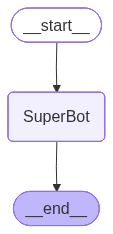

In [20]:
# Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [21]:
# Invocation
graph_builder.invoke({'messages': 'Hi, My name is Nidhi and I am an Engineer'})

{'messages': [HumanMessage(content='Hi, My name is Nidhi and I am an Engineer', additional_kwargs={}, response_metadata={}, id='ee772b64-dc7f-4f6b-ba3e-fe76531d7865'),
  AIMessage(content='Nice to meet you, Nidhi. Congratulations on being an Engineer. Which field of engineering do you specialize in, if I may ask?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 48, 'total_tokens': 78, 'completion_time': 0.049204011, 'completion_tokens_details': None, 'prompt_time': 0.002289766, 'prompt_tokens_details': None, 'queue_time': 0.051047634, 'total_time': 0.051493777}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b0dc4-fb0c-7513-8db0-977470e64e0f-0', usage_metadata={'input_tokens': 48, 'output_tokens': 30, 'total_tokens': 78})]}

In [23]:
# Streaming responses
builder = graph_builder.stream({'messages': 'Hi, My name is Nidhi and I am an Engineer'}, stream_mode="values")

for event in builder:
    print(event)

{'messages': [HumanMessage(content='Hi, My name is Nidhi and I am an Engineer', additional_kwargs={}, response_metadata={}, id='d9140a43-1bae-4976-b0a4-8f02959bea95')]}
{'messages': [HumanMessage(content='Hi, My name is Nidhi and I am an Engineer', additional_kwargs={}, response_metadata={}, id='d9140a43-1bae-4976-b0a4-8f02959bea95'), AIMessage(content="Nice to meet you, Nidhi. It's great to hear that you're an engineer. What kind of engineering do you specialize in?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 48, 'total_tokens': 78, 'completion_time': 0.04216764, 'completion_tokens_details': None, 'prompt_time': 0.002310249, 'prompt_tokens_details': None, 'queue_time': 0.05424965, 'total_time': 0.044477889}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b0dce-e13b-7ea1-81c8-b45d7c175098

In [24]:
# Streaming responses
builder = graph_builder.stream({'messages': 'Hi, My name is Nidhi and I am an Engineer'}, stream_mode="updates")

for event in builder:
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Nice to meet you, Nidhi! As an engineer, you must be passionate about solving problems and creating innovative solutions. What kind of engineering do you specialize in? Are you working on any exciting projects currently?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 48, 'total_tokens': 92, 'completion_time': 0.064867877, 'completion_tokens_details': None, 'prompt_time': 0.002509744, 'prompt_tokens_details': None, 'queue_time': 0.311105674, 'total_time': 0.067377621}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_29e590f0c0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b0dcf-5b85-7ab3-adcd-5f3e204e7190-0', usage_metadata={'input_tokens': 48, 'output_tokens': 44, 'total_tokens': 92})]}}
